# Thống kê mô tả

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [2]:
data = pd.read_csv('../data/preprecessed_data/data_for_model.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Country                                                                                           200 non-null    object 
 1   Year                                                                                              200 non-null    int64  
 2   Carbon stocks in forests                                                                          120 non-null    float64
 3   Change in mean sea level: Sea level                                                               200 non-null    float64
 4   Drought                                                                                           200 non-null    float64
 5   E

In [4]:
import pandas as pd

# Giả sử data là DataFrame của bạn
data.rename(columns={
    'Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980': 'feature 1',
    'Forest area': 'feature 2',
    'Carbon stocks in forests': 'feature 3',
    'Share of forest area': 'feature 4',
    'Yearly Atmospheric Carbon Dioxide Concentrations': 'feature 5',
    'Change in mean sea level: Sea level': 'feature 6',

    'Flood': 'feature 7',
    'Drought': 'feature 8',
    'Extreme temperature': 'feature 9',
    'Landslide': 'feature 10',
    'Storm': 'feature 11',
    'Wildfire': 'feature 12',
    'TOTAL': 'feature 13'
}, inplace=True)

In [5]:
# Đổi thứ tự các cột theo đúng yêu cầu
data1 = data[['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5', 'feature 6', 'feature 7',
         'feature 8', 'feature 9', 'feature 10', 'feature 11', 'feature 12', 'feature 13']]


In [6]:
data1.head(10)

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,feature 11,feature 12,feature 13
0,2.739,328.89,15.4052,11.552160,408.715000,57.700270,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.864,328.68,15.3954,11.544784,411.649167,64.094865,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.954,328.47,15.3855,11.537408,414.214167,66.817027,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2.183,328.26,NaN,11.530032,416.414167,71.507568,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.845,328.05,NaN,11.522655,418.528333,73.794054,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.911,1883.40,81.9844,14.468772,408.715000,57.700270,2.0,0.0,1.0,0.0,1.0,0.0,4.0
6,1.151,1883.40,81.9844,14.468772,411.649167,64.094865,1.0,0.0,1.0,1.0,3.0,0.0,6.0
7,0.934,1883.40,81.9844,14.468772,414.214167,66.817027,1.0,0.0,0.0,0.0,1.0,0.0,2.0
8,1.326,1883.40,NaN,14.468772,416.414167,71.507568,1.0,0.0,0.0,0.0,1.0,0.0,2.0
9,1.240,1883.40,NaN,14.468772,418.528333,73.794054,1.0,0.0,0.0,0.0,1.0,0.0,2.0


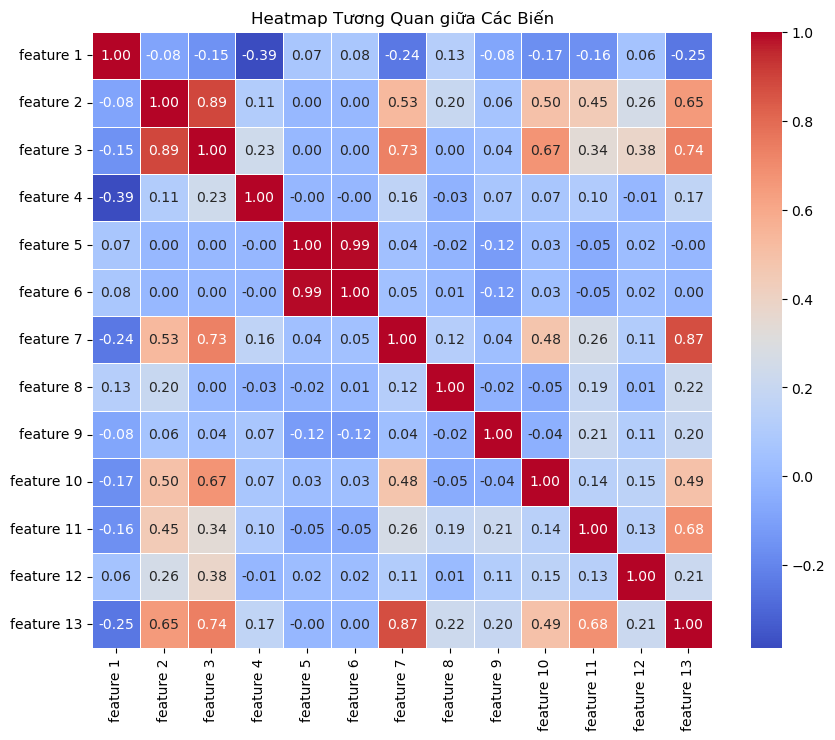

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính toán ma trận tương quan giữa các biến
corr_matrix = data1.corr()

# Vẽ heatmap tương quan
plt.figure(figsize=(10, 8))  # Kích thước của heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Tương Quan giữa Các Biến')
plt.show()


In [8]:
data = data[['Year', 'feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5', 'feature 6', 'feature 7',
         'feature 8', 'feature 9', 'feature 10', 'feature 11', 'feature 12', 'feature 13']]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23076\2561393240.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=year_column, y=feature, data=df, ax=axes[i], palette="Set1")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23076\2561393240.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=year_column, y=feature, data=df, ax=axes[i], palette="Set1")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23076\2561393240.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=year_column, y=feature, data=df, ax=axes[i], palette="Set1")
C:\Users\Leno

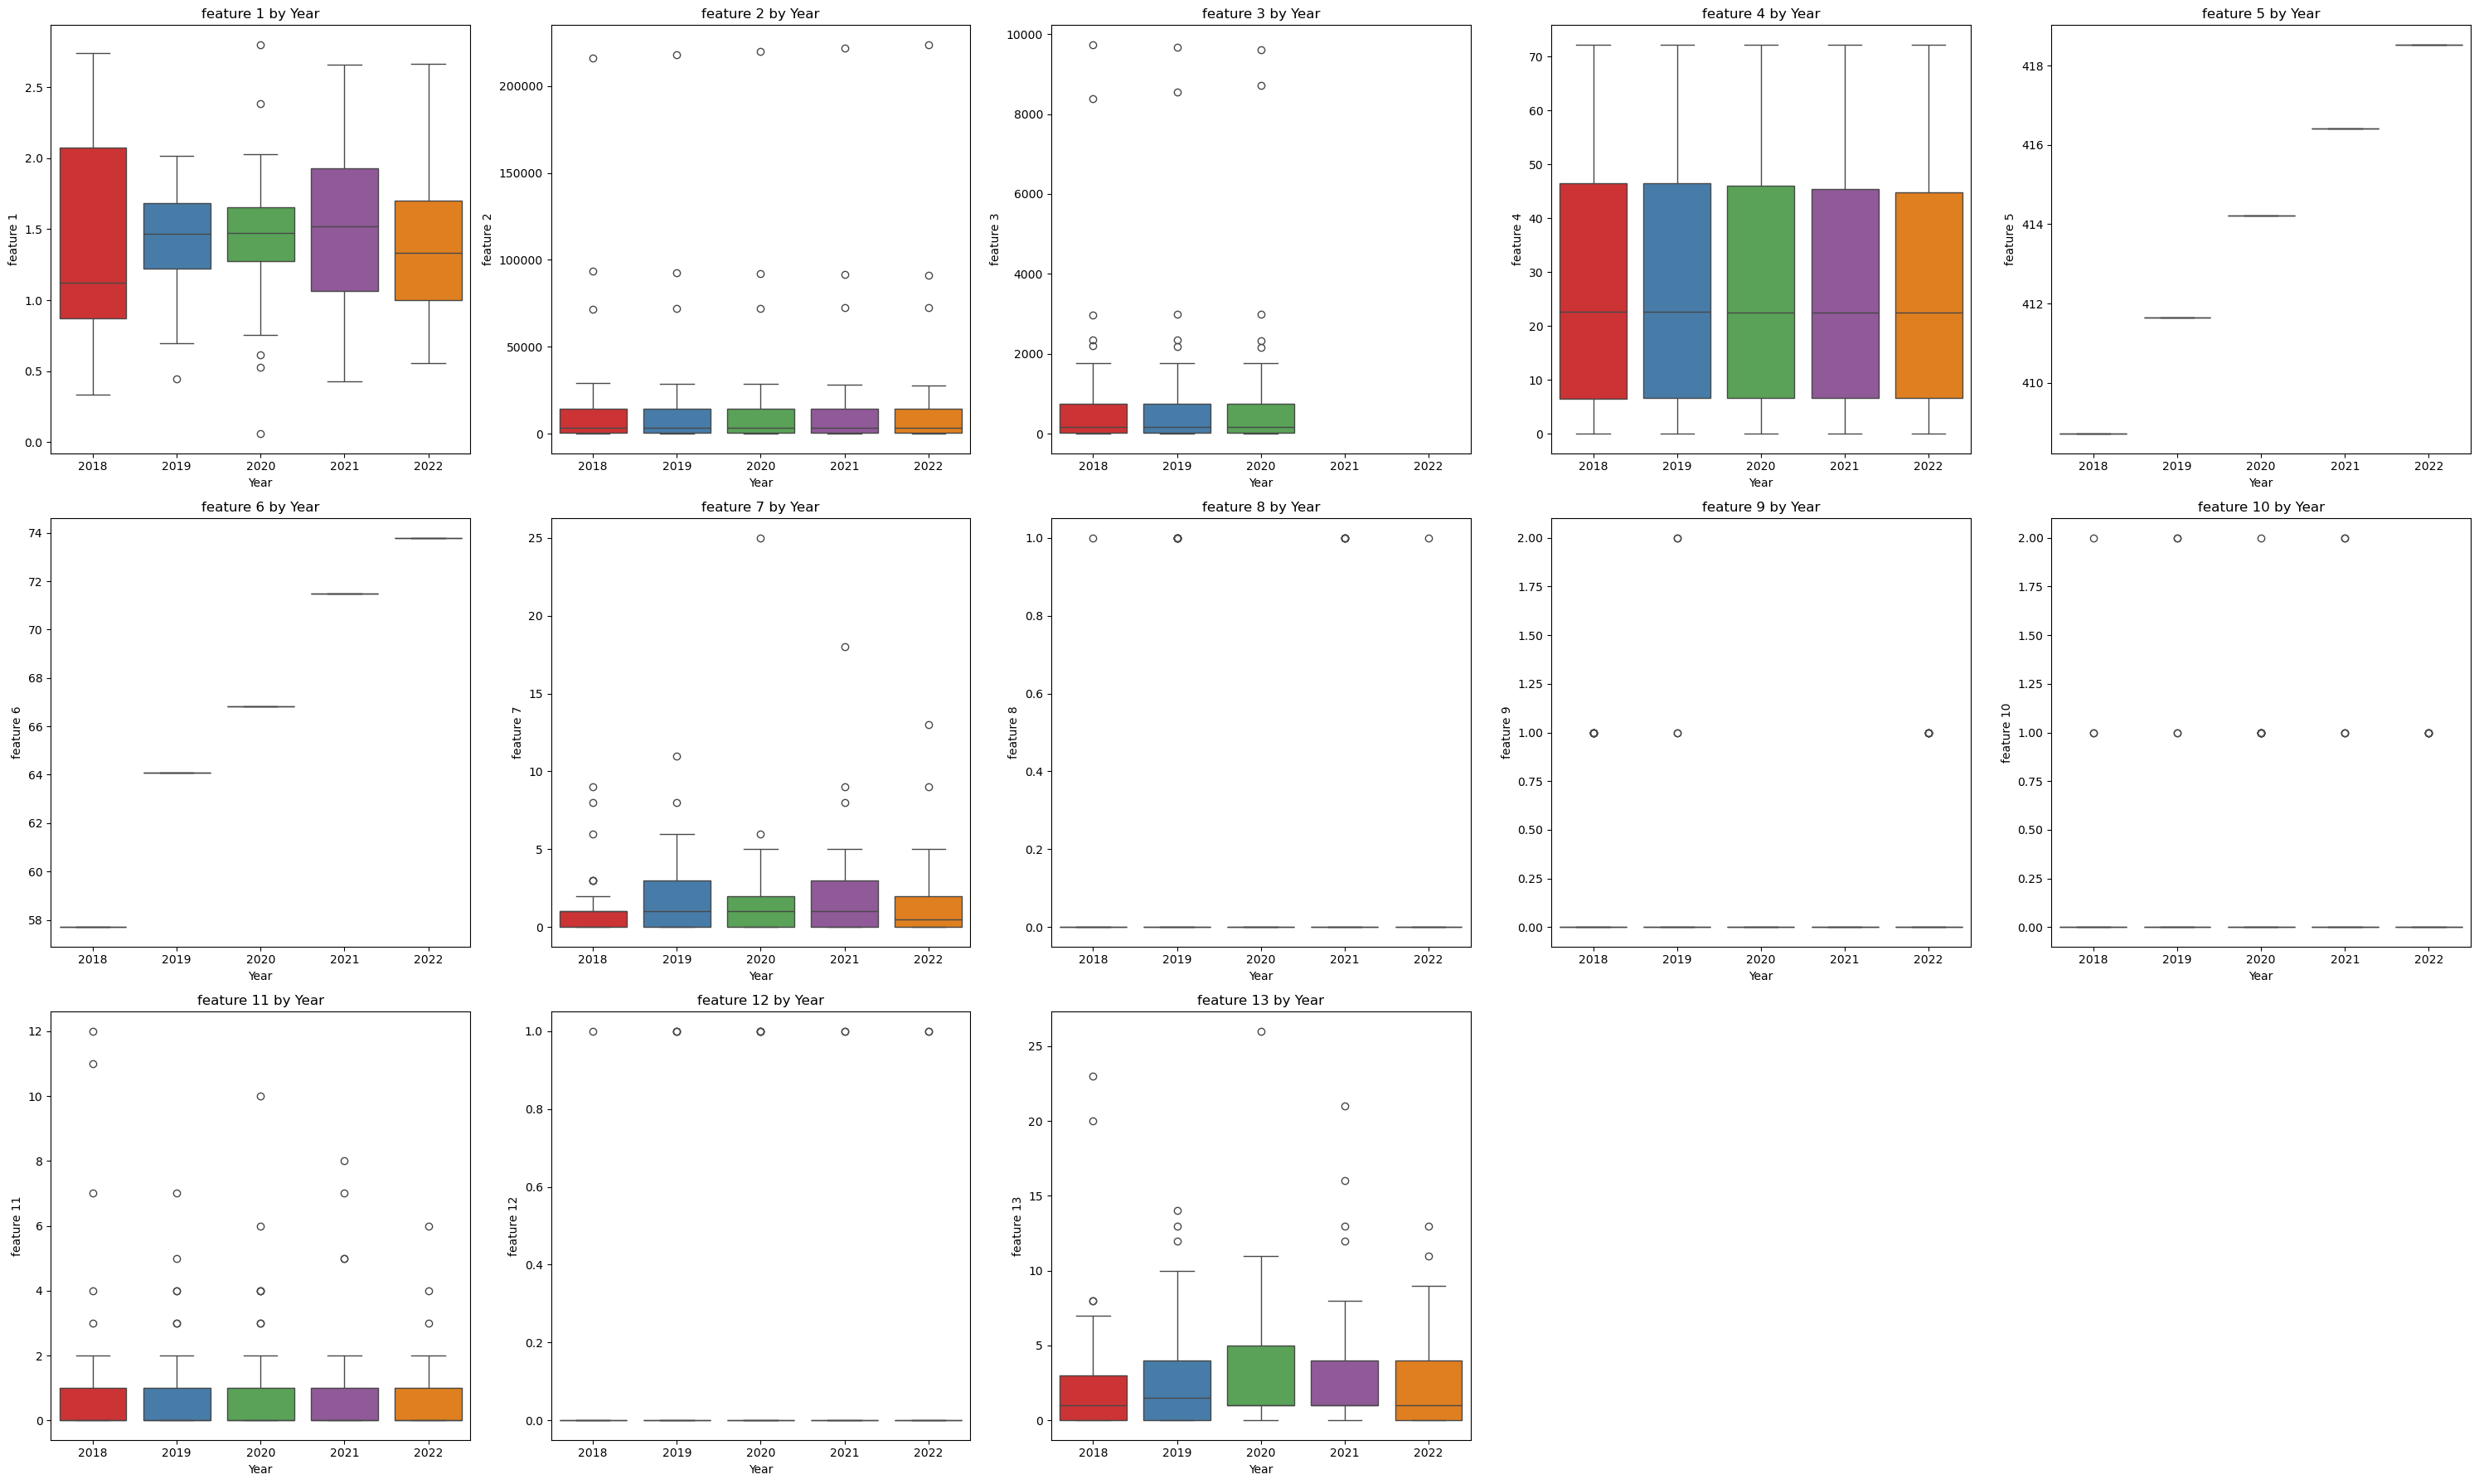

In [11]:
def plot_features_boxplots_by_year_grid(df, feature_columns, year_column='Year', plots_per_row=4):
    """
    Vẽ box plot theo năm, mỗi hàng chứa nhiều box plot cho các feature, mỗi box tương ứng với 1 năm.

    Parameters:
    - df: DataFrame chứa dữ liệu
    - feature_columns: Danh sách tên các cột feature để vẽ box plot
    - year_column: Tên cột biểu diễn năm (mặc định là 'Year')
    - plots_per_row: Số lượng box plot mỗi hàng
    """
    num_features = len(feature_columns)
    num_rows = (num_features + plots_per_row - 1) // plots_per_row  # Tính số hàng cần thiết

    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 6, num_rows * 6), sharey=False)
    axes = axes.flatten()

    for i, feature in enumerate(feature_columns):
        sns.boxplot(x=year_column, y=feature, data=df, ax=axes[i], palette="Set1")
        axes[i].set_title(f'{feature} by {year_column}')
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel(feature)

    # Ẩn các subplot dư thừa
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Gọi hàm để vẽ box plot theo dạng lưới, 4 plots mỗi hàng
plot_features_boxplots_by_year_grid(data, ['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5', 'feature 6', 'feature 7',
         'feature 8', 'feature 9', 'feature 10', 'feature 11', 'feature 12', 'feature 13'], plots_per_row=5)


## Linear Regression and Residual plot

### Total

R2 Score: -0.1432679728066013
Mean Absolute Error (MAE): 2.2890212951841287
Mean Squared Error (MSE): 9.291910448985652


<ipython-input-51-3e0865547b13>:61: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test.values.flatten(), label="Actual", shade=True, ax=axes[0])
<ipython-input-51-3e0865547b13>:62: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred.flatten(), label="Predicted", shade=True, ax=axes[0])


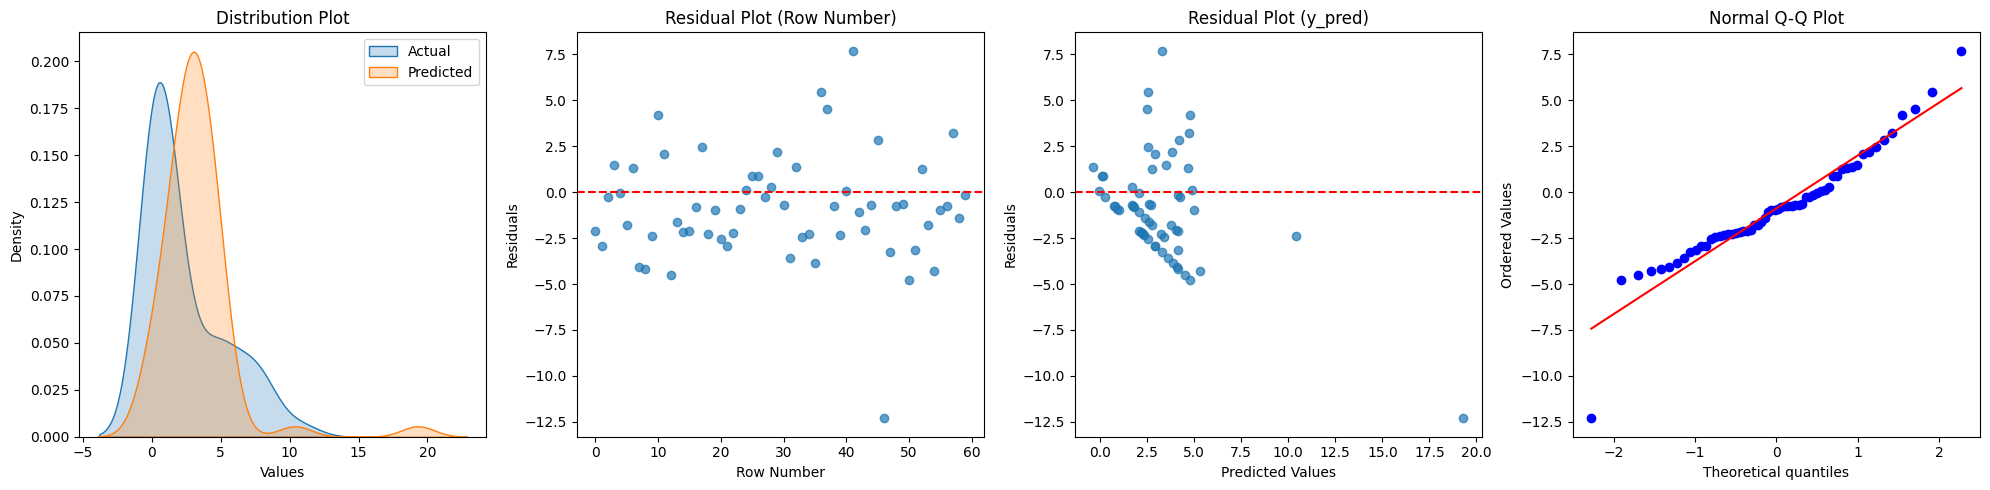

In [51]:
# Import các thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Đọc dữ liệu
data = pd.read_csv('/content/data_model.csv')

# Đổi tên cột
data.rename(columns={
    'Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980': 'feature 1',
    'Forest area': 'feature 2',
    'Carbon stocks in forests': 'feature 3',
    'Share of forest area': 'feature 4',
    'Yearly Atmospheric Carbon Dioxide Concentrations': 'feature 5',
    'Change in mean sea level: Sea level': 'feature 6',
    'Flood': 'feature 7',
    'Drought': 'feature 8',
    'Extreme temperature': 'feature 9',
    'Landslide': 'feature 10',
    'Storm': 'feature 11',
    'Wildfire': 'feature 12',
    'TOTAL': 'feature 13'
}, inplace=True)

# Chuẩn bị dữ liệu
X = data[['feature 1', 'feature 2', 'feature 4', 'feature 5', 'feature 6']]
y = data[['feature 13']]

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Huấn luyện mô hình Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Tính toán các chỉ số đánh giá
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

# Residuals
residuals = y_test.values.flatten() - y_pred.flatten()

# Tạo subplot với 4 biểu đồ trên cùng một hàng
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Distribution Plot of y_true vs y_predict
sns.kdeplot(y_test.values.flatten(), label="Actual", shade=True, ax=axes[0])
sns.kdeplot(y_pred.flatten(), label="Predicted", shade=True, ax=axes[0])
axes[0].set_title('Distribution Plot')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Density')
axes[0].legend()

# Residual Plot theo Row Number
axes[1].scatter(range(len(residuals)), residuals, alpha=0.7)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_title('Residual Plot (Row Number)')
axes[1].set_xlabel('Row Number')
axes[1].set_ylabel('Residuals')

# Residual Plot giữa y_true và y_pred
axes[2].scatter(y_pred.flatten(), residuals, alpha=0.7)
axes[2].axhline(y=0, color='r', linestyle='--')
axes[2].set_title('Residual Plot (y_pred)')
axes[2].set_xlabel('Predicted Values')
axes[2].set_ylabel('Residuals')

# Normal Quantile Plot of Residuals (Q-Q Plot)
stats.probplot(residuals, dist="norm", plot=axes[3])
axes[3].set_title('Normal Q-Q Plot')

# Điều chỉnh khoảng cách giữa các plot
plt.tight_layout()
plt.show()


### Storm

R2 Score: -0.14257226038054038
Mean Absolute Error (MAE): 1.2381908396207
Mean Squared Error (MSE): 4.226247838674243


<ipython-input-52-1e93a575452c>:61: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test.values.flatten(), label="Actual", shade=True, ax=axes[0])
<ipython-input-52-1e93a575452c>:62: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred.flatten(), label="Predicted", shade=True, ax=axes[0])


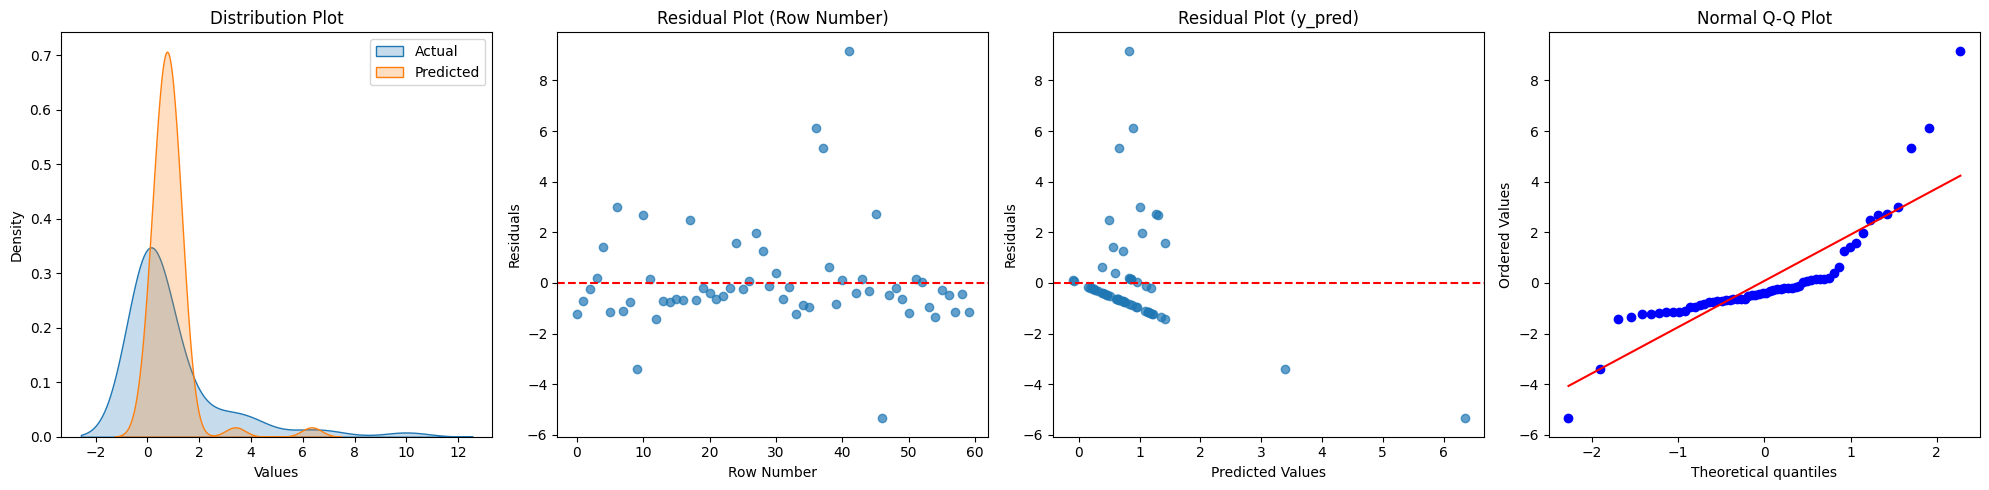

In [52]:
# Import các thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Đọc dữ liệu
data = pd.read_csv('/content/data_model.csv')

# Đổi tên cột
data.rename(columns={
    'Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980': 'feature 1',
    'Forest area': 'feature 2',
    'Carbon stocks in forests': 'feature 3',
    'Share of forest area': 'feature 4',
    'Yearly Atmospheric Carbon Dioxide Concentrations': 'feature 5',
    'Change in mean sea level: Sea level': 'feature 6',
    'Flood': 'feature 7',
    'Drought': 'feature 8',
    'Extreme temperature': 'feature 9',
    'Landslide': 'feature 10',
    'Storm': 'feature 11',
    'Wildfire': 'feature 12',
    'TOTAL': 'feature 13'
}, inplace=True)

# Chuẩn bị dữ liệu
X = data[['feature 1', 'feature 2', 'feature 4', 'feature 5', 'feature 6']]
y = data[['feature 11']]

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Huấn luyện mô hình Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Tính toán các chỉ số đánh giá
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

# Residuals
residuals = y_test.values.flatten() - y_pred.flatten()

# Tạo subplot với 4 biểu đồ trên cùng một hàng
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Distribution Plot of y_true vs y_predict
sns.kdeplot(y_test.values.flatten(), label="Actual", shade=True, ax=axes[0])
sns.kdeplot(y_pred.flatten(), label="Predicted", shade=True, ax=axes[0])
axes[0].set_title('Distribution Plot')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Density')
axes[0].legend()

# Residual Plot theo Row Number
axes[1].scatter(range(len(residuals)), residuals, alpha=0.7)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_title('Residual Plot (Row Number)')
axes[1].set_xlabel('Row Number')
axes[1].set_ylabel('Residuals')

# Residual Plot giữa y_true và y_pred
axes[2].scatter(y_pred.flatten(), residuals, alpha=0.7)
axes[2].axhline(y=0, color='r', linestyle='--')
axes[2].set_title('Residual Plot (y_pred)')
axes[2].set_xlabel('Predicted Values')
axes[2].set_ylabel('Residuals')

# Normal Quantile Plot of Residuals (Q-Q Plot)
stats.probplot(residuals, dist="norm", plot=axes[3])
axes[3].set_title('Normal Q-Q Plot')

# Điều chỉnh khoảng cách giữa các plot
plt.tight_layout()
plt.show()


### Flood

R2 Score: -0.36675161958286906
Mean Absolute Error (MAE): 1.4295685724919538
Mean Squared Error (MSE): 3.521283686564198


<ipython-input-53-a7b7638f8779>:61: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test.values.flatten(), label="Actual", shade=True, ax=axes[0])
<ipython-input-53-a7b7638f8779>:62: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred.flatten(), label="Predicted", shade=True, ax=axes[0])


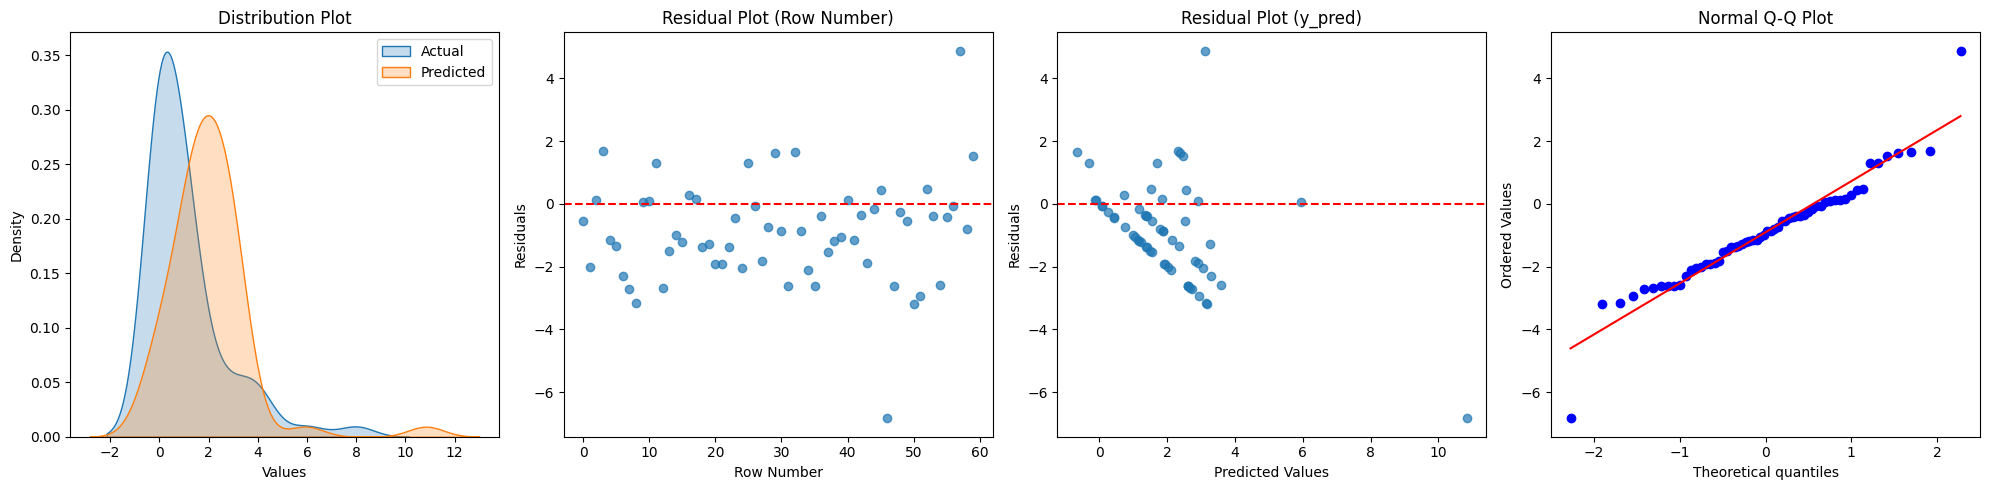

In [53]:
# Import các thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Đọc dữ liệu
data = pd.read_csv('/content/data_model.csv')

# Đổi tên cột
data.rename(columns={
    'Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980': 'feature 1',
    'Forest area': 'feature 2',
    'Carbon stocks in forests': 'feature 3',
    'Share of forest area': 'feature 4',
    'Yearly Atmospheric Carbon Dioxide Concentrations': 'feature 5',
    'Change in mean sea level: Sea level': 'feature 6',
    'Flood': 'feature 7',
    'Drought': 'feature 8',
    'Extreme temperature': 'feature 9',
    'Landslide': 'feature 10',
    'Storm': 'feature 11',
    'Wildfire': 'feature 12',
    'TOTAL': 'feature 13'
}, inplace=True)

# Chuẩn bị dữ liệu
X = data[['feature 1', 'feature 2', 'feature 4', 'feature 5', 'feature 6']]
y = data[['feature 7']]

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Huấn luyện mô hình Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Tính toán các chỉ số đánh giá
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

# Residuals
residuals = y_test.values.flatten() - y_pred.flatten()

# Tạo subplot với 4 biểu đồ trên cùng một hàng
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Distribution Plot of y_true vs y_predict
sns.kdeplot(y_test.values.flatten(), label="Actual", shade=True, ax=axes[0])
sns.kdeplot(y_pred.flatten(), label="Predicted", shade=True, ax=axes[0])
axes[0].set_title('Distribution Plot')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Density')
axes[0].legend()

# Residual Plot theo Row Number
axes[1].scatter(range(len(residuals)), residuals, alpha=0.7)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_title('Residual Plot (Row Number)')
axes[1].set_xlabel('Row Number')
axes[1].set_ylabel('Residuals')

# Residual Plot giữa y_true và y_pred
axes[2].scatter(y_pred.flatten(), residuals, alpha=0.7)
axes[2].axhline(y=0, color='r', linestyle='--')
axes[2].set_title('Residual Plot (y_pred)')
axes[2].set_xlabel('Predicted Values')
axes[2].set_ylabel('Residuals')

# Normal Quantile Plot of Residuals (Q-Q Plot)
stats.probplot(residuals, dist="norm", plot=axes[3])
axes[3].set_title('Normal Q-Q Plot')

# Điều chỉnh khoảng cách giữa các plot
plt.tight_layout()
plt.show()
